In [ ]:
import requests

from PIL import Image
from transformers import AutoProcessor, AutoModelForVision2Seq


model = AutoModelForVision2Seq.from_pretrained("microsoft/kosmos-2-patch14-224")
processor = AutoProcessor.from_pretrained("microsoft/kosmos-2-patch14-224")

prompt = "<grounding>An image of"

url = "https://huggingface.co/microsoft/kosmos-2-patch14-224/resolve/main/snowman.png"
image = Image.open(requests.get(url, stream=True).raw)

image.save("new_image.jpg")
image = Image.open("new_image.jpg")

inputs = processor(text=prompt, images=image, return_tensors="pt")

generated_ids = model.generate(
    pixel_values=inputs["pixel_values"],
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    image_embeds=None,
    image_embeds_position_mask=inputs["image_embeds_position_mask"],
    use_cache=True,
    max_new_tokens=128,
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)

print(processed_text)

processed_text, entities = processor.post_process_generation(generated_text)

print(processed_text)

print(entities)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.45k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.66G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/534 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/191k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.70M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/32.0k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<grounding> An image of<phrase> a snowman</phrase><object><patch_index_0044><patch_index_0863></object> warming himself by<phrase> a fire</phrase><object><patch_index_0005><patch_index_0911></object>.
An image of a snowman warming himself by a fire.
[('a snowman', (12, 21), [(0.390625, 0.046875, 0.984375, 0.828125)]), ('a fire', (41, 47), [(0.171875, 0.015625, 0.484375, 0.890625)])]


In [ ]:
image = Image.open('/content/Portal1.png')


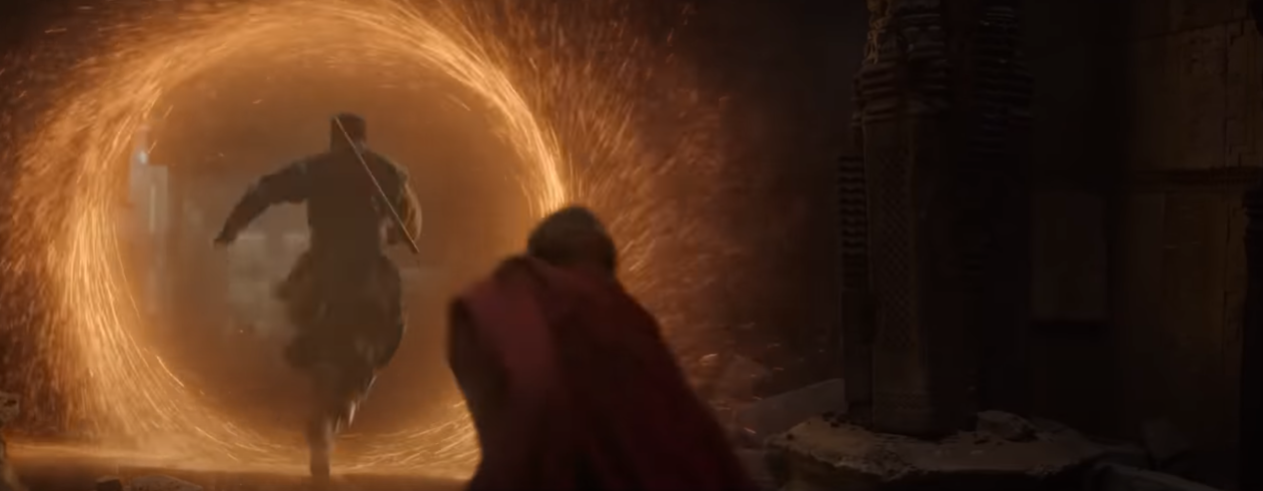

In [ ]:
image

In [ ]:
inputs = processor(text=prompt, images=image, return_tensors="pt")

generated_ids = model.generate(
    pixel_values=inputs["pixel_values"],
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    image_embeds=None,
    image_embeds_position_mask=inputs["image_embeds_position_mask"],
    use_cache=True,
    max_new_tokens=128,
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)

print(processed_text)

processed_text, entities = processor.post_process_generation(generated_text)

print(processed_text)

print(entities)


<grounding> An image of<phrase> Superman</phrase><object><patch_index_0229><patch_index_1002></object> running into<phrase> a portal</phrase><object><patch_index_0000><patch_index_1008></object>
An image of Superman running into a portal
[('Superman', (12, 20), [(0.171875, 0.234375, 0.328125, 0.984375)]), ('a portal', (34, 42), [(0.015625, 0.015625, 0.515625, 0.984375)])]


In [ ]:
processed_text

'An image of Superman running into a portal'

In [ ]:
image = Image.open('/content/UAM(Millennium Falcon)5.png')

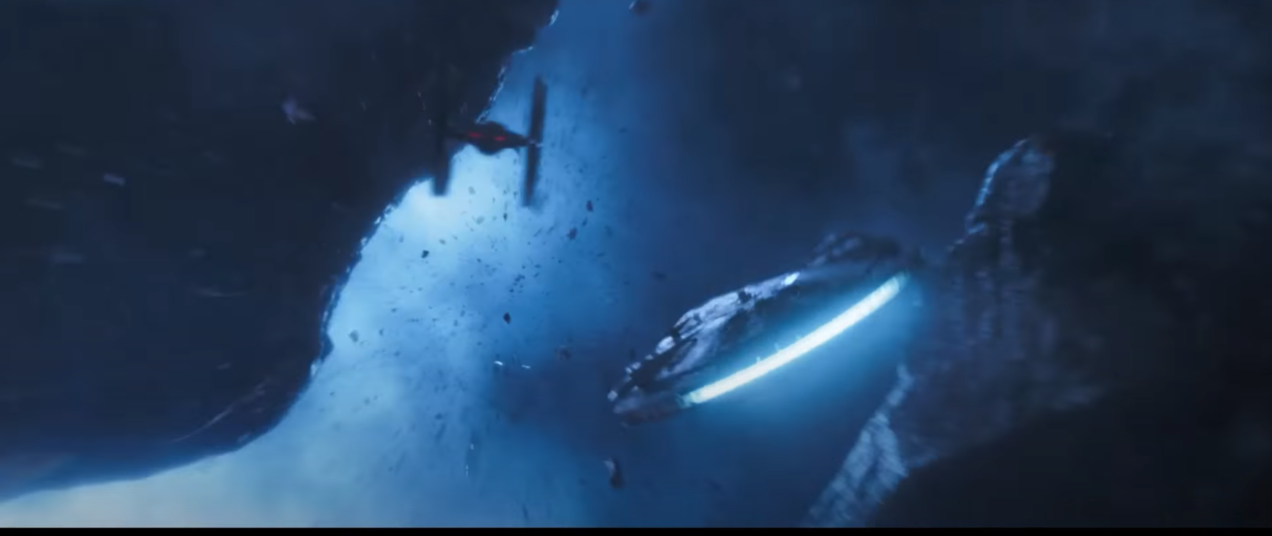

In [ ]:
image

In [ ]:
image = Image.open('/content/UAM(Millennium Falcon)5.png')
inputs = processor(text=prompt, images=image, return_tensors="pt")

generated_ids = model.generate(
    pixel_values=inputs["pixel_values"],
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    image_embeds=None,
    image_embeds_position_mask=inputs["image_embeds_position_mask"],
    use_cache=True,
    max_new_tokens=128,
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)

print(processed_text)

processed_text, entities = processor.post_process_generation(generated_text)

print(processed_text)

print(entities)


<grounding> An image of<phrase> a spaceship</phrase><object><patch_index_0430><patch_index_0823></object> and<phrase> an asteroid</phrase><object><patch_index_0000><patch_index_1006></object> from the movie 'Ender's Game'
An image of a spaceship and an asteroid from the movie 'Ender's Game'
[('a spaceship', (12, 23), [(0.453125, 0.421875, 0.734375, 0.796875)]), ('an asteroid', (28, 39), [(0.015625, 0.015625, 0.453125, 0.984375)])]


In [ ]:
processed_text

"An image of a spaceship and an asteroid from the movie 'Ender's Game'"

In [ ]:
!unzip -qq "/content/iMAGECAPTIONNING.zip"

warning [/content/iMAGECAPTIONNING.zip]:  1048576 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  1048576
  (attempting to re-compensate)
error: invalid zip file with overlapped components (possible zip bomb)


In [ ]:
import os
from PIL import Image

image_folder = 'path/to/image/folder'

image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]  # 여러 이미지 형식 지원

captions = []

for img_path in image_paths:
    try:
        image = Image.open(img_path)

        inputs = processor(text=prompt, images=image, return_tensors="pt")

        generated_ids = model.generate(
            pixel_values=inputs["pixel_values"],
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            image_embeds=None,
            image_embeds_position_mask=inputs["image_embeds_position_mask"],
            use_cache=True,
            max_new_tokens=128,
        )

        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        processed_text, entities = processor.post_process_generation(generated_text)

        captions.append((img_path, processed_text, entities))

    except Exception as e:
        print(f'Error processing image: {img_path}, Error: {e}')

for img_path, caption, entities in captions:
    print(f'Image: {img_path}, Caption: {caption}, Entities: {entities}')


In [ ]:
import pandas as pd

df = pd.DataFrame(captions, columns=['Image Path', 'Processed Text', 'Entities'])

\excel_path = '/path/to/save/captions.xlsx'
df.to_excel(excel_path, index=False)

print(f'Captions saved to {excel_path}')
